<a href="https://colab.research.google.com/github/polaamgad88/Covid-stats/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving Covid 2019 stats.csv to Covid 2019 stats (38).csv
   Country/Region      Continent  Population  TotalCases  TotalDeaths  \
0             USA  North America   331198130     5032179       162804   
1          Brazil  South America   212710692     2917562        98644   
2           India           Asia  1381344997     2025409        41638   
3          Russia         Europe   145940924      871894        14606   
4    South Africa         Africa    59381566      538184         9604   
5          Mexico  North America   129066160      462690        50517   
6            Peru  South America    33016319      455409        20424   
7           Chile  South America    19132514      366671         9889   
8        Colombia  South America    50936262      357710        11939   
9           Spain         Europe    46756648      354530        28500   
10           Iran           Asia    84097623      320117        17976   
11             UK         Europe    67922029      308134        464

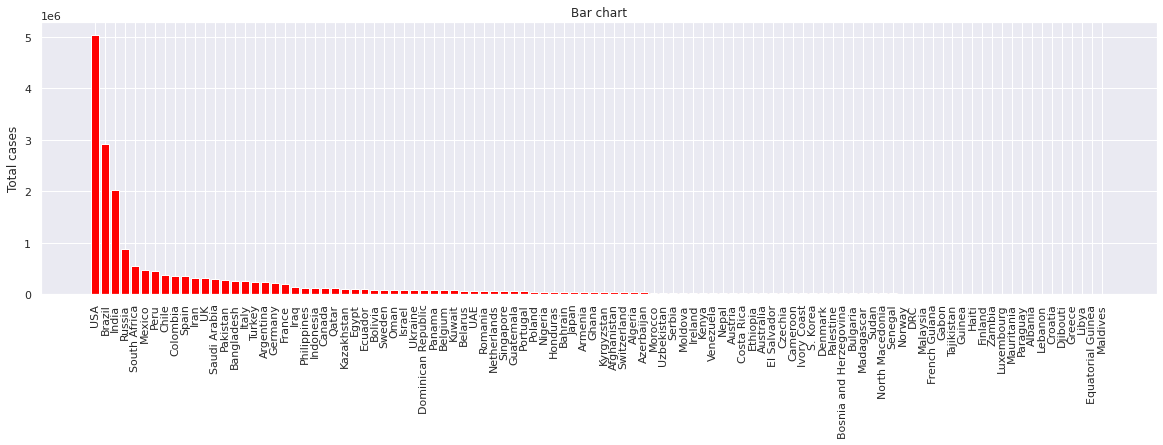

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>

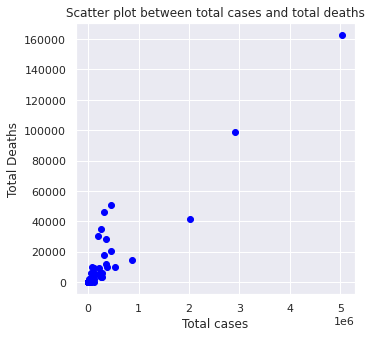

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>

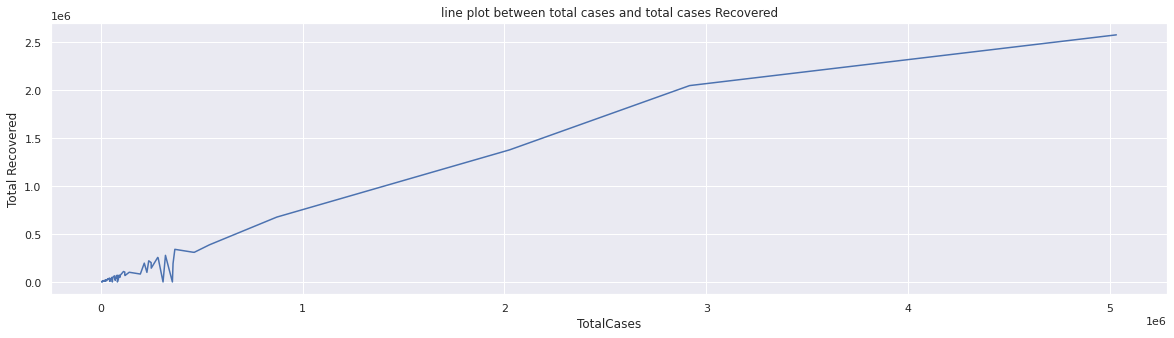

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Co-efficient of linear regression [[8.75292648]]
Actual:  [190640.] predicted:  [172427.87593911] Covid :  15194
Actual:  [62085.] predicted:  [159491.05059754] Covid :  13716
Actual:  [16035.] predicted:  [52267.70118325] Covid :  1466
Actual:  [203623.] predicted:  [91725.89376771] Covid :  5974
Actual:  [53044.] predicted:  [118763.68367307] Covid :  9063
Actual:  [8189.] predicted:  [70815.1524003] Covid :  3585
Actual:  [75521.] predicted:  [160165.02593671] Covid :  13793
Actual:  [92022.] predicted:  [207185.74700231] Covid :  19165
Actual:  [35374.] predicted:  [100907.71364817] Covid :  7023
Actual:  [151087.] predicted:  [105800.59955205] Covid :  7582
Actual:  [31068.] predicted:  [72749.549153] Covid :  3806
Actual:  [257873.] predicted:  [79147.93841193] Covid :  4537
Actual:  [104277.] predicted:  [110789.76764724] Covid :  8152
Actual:  [9304.] predicted:  [50587.13929856] Covid :  1274
Actual:  [7432.] predicted:  [52687.84165443] Covid :  1514
Actual:  [117443.] predic

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>

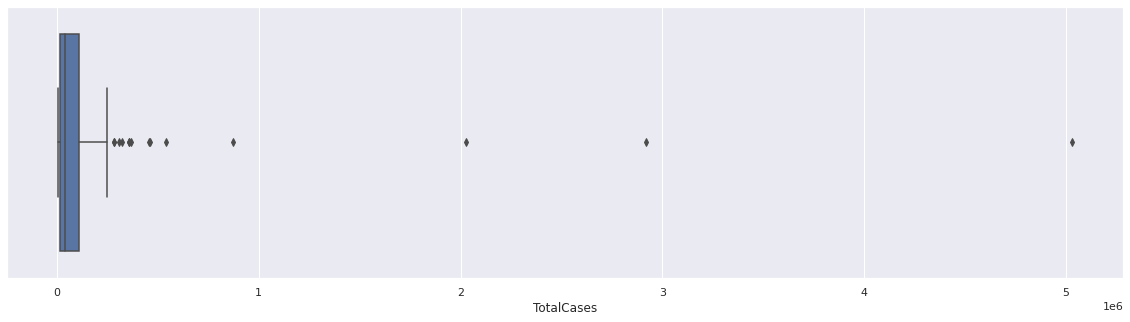

In [53]:
from IPython.core.pylabtools import figsize
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from google.colab import files
from google.colab import files
import io
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from numpy import quantile,random, where
from sklearn.neighbors import LocalOutlierFactor
from sklearn.datasets import make_blobs
from scipy import stats
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from matplotlib.colors import ListedColormap
from sklearn.cluster import DBSCAN
from numpy import  where
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor

uploaded = files.upload()

# 1. Search for a real simple dataset [with numeric values for the
# following requirements with multiple attributes (a minimum of 8
# relevant attributes and minimum 50 rows).

data = io.BytesIO(uploaded['Covid 2019 stats.csv'])  
df = pd.read_csv('Covid 2019 stats.csv')

# 3. Describe the dataset attributes 

print(df.head(20))
print(df.describe()) 
print(df.info()) 


#4. Apply data cleaning methods (if needed) 
#here we replace missing values with 0
df['TotalRecovered'] =df['TotalRecovered'].replace(np.nan, 0)
df['ActiveCases'] =df['ActiveCases'].replace(np.nan, 0)
df['Serious,Critical'] =df['Serious,Critical'].replace(np.nan, 0)

#here we check if missing values in our dataframes are cleaned or not
print(df.head(20))


# 5. Apply different data visualization charts min 2 charts [ Data
# Exploration], select the appropriate chart that allow you to
# observe more knowledge about your dataset


#Bar chart
plt.figure(figsize=(20,5))

x=(df['Country/Region'])
y=(df['TotalCases'])
plt.title("Bar chart")
plt.ylabel('Total cases')

plt.bar(x, y , color='red')
plt.xticks(rotation=90)

plt.show()
plt.savefig("Bar chart.png")
files.download("Bar chart.png")



#scatter plot
plt.figure(figsize=(5,5))

plt.scatter(df['TotalCases'],df['TotalDeaths'], c = "blue")
plt.ylabel('Total Deaths')
plt.xlabel('Total cases')
plt.title("Scatter plot between total cases and total deaths")
plt.show()
plt.savefig("scatter plot.png")
files.download("scatter plot.png")


#line chart 
plt.figure(figsize=(20,5))

plt.plot(df['TotalCases'], df['TotalRecovered'])
plt.xlabel('TotalCases')
plt.ylabel('Total Recovered')
plt.title('line plot between total cases and total cases Recovered')
plt.show()
plt.savefig("Line chart.png")
files.download("Line chart.png")




#predictive analytic techniques 
df.dropna(how ='any',inplace=True)
x=df.iloc[:,8].values.reshape(-1,1)##Features
y = df.iloc[:,11].values.reshape(-1,1)#Values
CLS = linear_model.LinearRegression()
CLS.fit(x,y)
Prediction= CLS.predict(x)
print('Co-efficient of linear regression',CLS.coef_)
for i in range(len(Prediction)):
    print('Actual: ' , y[i] , 'predicted: ',Prediction[i] , 'Covid : ',x[i,0] )
print('Mean Square Error', metrics.mean_squared_error(np.asarray(y), Prediction))






#predictive analytic techniques [multiple]//decision tree regresion



df.dropna(how ='any',inplace=True)
x=df.iloc[:,8:10]##Features
y = df.iloc[:,11].values.reshape(-1,1)#Values
CLS = tree.DecisionTreeRegressor()
CLS.fit(x,y)
Prediction= CLS.predict(x)

print('prediction value',Prediction)

print('Model features',CLS.feature_importances_)
for i in range(len(Prediction)):
    print('Actual: ' , y[i] , 'predicted: ',Prediction[i])

print('Mean Square Error', metrics.mean_squared_error(np.asarray(y), Prediction))

#export_graphviz(CLS,out_file='DecisionTree.dot')
#with open('DecisionTree.dot') as f:
 #   dot_graph=f.read()
#G=graphviz.Source(dot_graph)
#G.render()
#print('pdf of tree createrd')










#Anomly detection in 2 methods 
print("---------------------")
x= df['TotalCases']
x=x.values.reshape(-1,1)
lof = LocalOutlierFactor(n_neighbors=4, contamination=.03)
y_pred = lof.fit_predict(x)
print(y_pred)
lofs_index = where(y_pred==-1)
values = x[lofs_index]
print(lofs_index)





#IQR
datasorted = np.sort(df['TotalDeaths'])
Q1 = np.percentile(df['TotalDeaths'], 25, interpolation = 'midpoint') 
Q2 = np.percentile(df['TotalDeaths'], 50, interpolation = 'midpoint') 
Q3 = np.percentile(df['TotalDeaths'], 75, interpolation = 'midpoint') 
IQR = Q3 - Q1 
#print('Interquartile range is', IQR)
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('low_limit is', low_lim)
print('up_limit is', up_lim)

outlier =[]
for x in df['TotalDeaths']:
    if ((x> up_lim) or (x<low_lim)):
         outlier.append(x)
print(' outlier in the dataset is', outlier)
IQR_graph = stats.iqr(df['TotalCases'], interpolation = 'midpoint')
IQR_graph
plt.figure(figsize=(20,5))
sns.boxplot(df['TotalCases'])

plt.savefig("IQR.png")
files.download("IQR.png")







In [ ]:
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt')
import os
import nltk.corpus# sample text for performing tokenization
from nltk.tokenize import word_tokenize
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')


# 2. Search for another real simple dataset [with texts for text mining
# step only] or you can create it manually as a file with minimum
# 20 sentences.

#text we do text mining on 


# text = 'Its not only writers who can benefit from this free online tool. If you are a programmer who has working on a project where blocks of text are needed, this tool can be a great way to get that. Its a good way to test your programming and that the tool being created is working well. Above are a few examples of how the random paragraph generator can be beneficial. The best way to see if this random paragraph picker will be useful for your intended purposes is to give it a try. Generate a number of paragraphs to see if they are beneficial to your current project.If you do find this paragraph tool useful, please do us a favor and let us know how you are using it. Its greatly beneficial for us to know the different ways this tool is being used so we can improve it with updates. This is especially true since there are times when the generators we create get used in completely unanticipated ways from when we initially created them. If you have the time, please send us a quick note on what you would like to see changed or added to make it better in the future.'
file = open('TextFile.txt', 'r')
text = file.read()
print(text)

#remove panctuation
text = text.translate(str.maketrans('','', string.punctuation))


#Tokenization
#first step of NLP , break strings into tokens
from nltk.tokenize import word_tokenize
token = word_tokenize(text)
token

# finding the frequency distinct in the tokens
from nltk.probability import FreqDist
freqs = FreqDist(token)
freqs

# or find most common freqs
freqs1 = freqs.most_common(10)
freqs1



#Stemming
pst = PorterStemmer()
#stm = ["waited", "waiting", "waits"]
text=word_tokenize(text)
for word in text:
    print(pst.stem(word))




#lemmization
lemmatizer = WordNetLemmatizer() 
for word in text :
    print (lemmatizer.lemmatize(word))



stop_words = set(stopwords.words('english'))
result = [i for i in text if not i in stop_words]
print (result)







sia = SentimentIntensityAnalyzer()
sia.polarity_scores("Thanks for great expreience , am so happy")



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
Its not only writers who can benefit from this free online tool. 
If you are a programmer who has working on a project where blocks of text are needed, this tool can be a great way to get that. Its a good way to test your programming and that the tool being created is working well. 
Above are a few examples of how the random paragraph generator can be beneficial.
 The best way to see if this random paragraph picker will be useful for your intended purposes is to give it a try. 
Generate a number of paragraphs to see if the

{'compound': 0.9143, 'neg': 0.0, 'neu': 0.254, 'pos': 0.746}